In [18]:
import sympy as sp
from sympy import sqrt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
def Projection(Vek_a, i):
	return (Vek_a.dot(i))/sp.sqrt(i.dot(i))

In [14]:
class helix:
    def __init__(self, radius, pitch, num_turns):
        """
        Initialize a Helix object.

        Parameters:
        - radius (float): Radius of the helix.
        - pitch (float): Vertical distance between each turn of the helix.
        - num_turns (int): Number of complete turns the helix makes.
        """
        self.radius = radius
        self.pitch = pitch
        self.num_turns = num_turns
        self.t = sp.Symbol('t')
        self.x = radius * sp.cos(self.t)
        self.y = radius * sp.sin(self.t)
        self.z = pitch * self.t

    def plot(self):
        """
        Plot the helix in 3D.
        """
        t_values = np.linspace(0, 2 * np.pi * self.num_turns, 1000)
        x_values = [self.x.subs(self.t, val) for val in t_values]
        y_values = [self.y.subs(self.t, val) for val in t_values]
        z_values = [self.z.subs(self.t, val) for val in t_values]

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x_values, y_values, z_values)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Helix Plot')
        plt.show()

    def length(self):
        """
        Calculate the length of the helix.
        """
        integrand = sp.sqrt(sp.diff(self.x, self.t)**2 + sp.diff(self.y, self.t)**2 + sp.diff(self.z, self.t)**2)
        length = sp.integrate(integrand, (self.t, 0, 2 * np.pi * self.num_turns))
        return length

# Example usage
#helix = Helix(radius=1, pitch=1, num_turns=5)
#helix.plot()
#print("Length of the helix:", helix.length())


In [33]:
class ThreeDPlot:
    def __init__(self, equation, x_limits, y_limits, z_limits):
        self.equation = equation
        self.x_limits = x_limits
        self.y_limits = y_limits
        self.z_limits = z_limits

    def plot(self):
        x, y, z = sp.symbols('x y z')
        expr = sp.lambdify((x, y), self.equation, 'numpy')

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        if 'z' in str(self.equation):
            x_values = np.linspace(self.x_limits[0], self.x_limits[1], 100)
            y_values = np.linspace(self.y_limits[0], self.y_limits[1], 100)
            X, Y = np.meshgrid(x_values, y_values)
            Z = expr(X, Y)
            ax.plot_surface(X, Y, Z, cmap='viridis')
            ax.set_xlim(self.x_limits)
            ax.set_ylim(self.y_limits)
            ax.set_zlim(self.z_limits)
        else:
            x_values = np.linspace(self.x_limits[0], self.x_limits[1], 100)
            y_values = np.linspace(self.y_limits[0], self.y_limits[1], 100)
            X, Y = np.meshgrid(x_values, y_values)
            Z = expr(X, Y)
            ax.plot_surface(X, Y, Z, cmap='viridis')
            ax.set_xlim(self.x_limits)
            ax.set_ylim(self.y_limits)
            ax.set_zlim(self.z_limits)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()



# Lecture 1

## Opgave 1

In [ ]:
a = np.array([1,1,1])
b = np.array([1,2,1])

op1 = np.cross(a,b)
op2 = np.cross(a,op1)
op3 = np.cross(op1,op1)

print("Opgave svar:")
print()
print("Opgave 1.a")
print(f"Krydsproduktet af a og b: {op1}")
print("Opgave 1.b")
print(f"Krydsproduktet af a og b: {op2}")
print("Opgave 1.c")
print(f"Krydsproduktet af a og b: {op3}")

Opgave svar:

Opgave 1.a
Krydsproduktet af a og b: [-1  0  1]
Opgave 1.b
Krydsproduktet af a og b: [ 1 -2  1]
Opgave 1.c
Krydsproduktet af a og b: [0 0 0]


## Opgave 2

In [ ]:
# Define symbolic variables
x, y, z = sp.symbols('x y z')

# Define the vector
vector = [x*y*z, x*sp.cos(y*z), z*sp.exp(x*y)]
display(vector)

# Take the partial derivatives with respect to x, y, and z
df_dx = [sp.diff(expr, x) for expr in vector]
df_dy = [sp.diff(expr, y) for expr in vector]
df_dz = [sp.diff(expr, z) for expr in vector]
df_dxy = [sp.diff(expr, y) for expr in df_dx]

# Print the results
print("Partial derivative af x")
display(df_dx)

print("\nPartial derivative af y:")
display(df_dy)

print("\nPartial derivative af z:")
display(df_dz)

print("\nPartial derivative af xy:")
display(df_dxy)

[x*y*z, x*cos(y*z), z*exp(x*y)]

Partial derivative af x


[y*z, cos(y*z), y*z*exp(x*y)]


Partial derivative af y:


[x*z, -x*z*sin(y*z), x*z*exp(x*y)]


Partial derivative af z:


[x*y, -x*y*sin(y*z), exp(x*y)]


Partial derivative af xy:


[z, -z*sin(y*z), x*y*z*exp(x*y) + z*exp(x*y)]

## Opgave 3

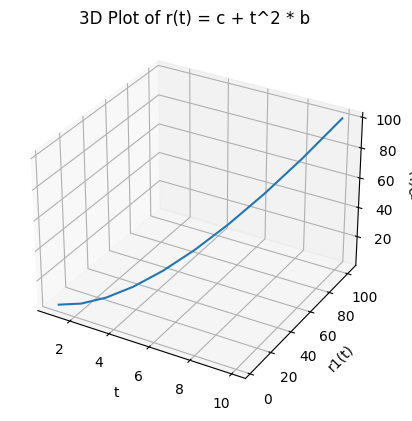

The velocity is:


Matrix([
[2*t],
[  0],
[  0]])

The acceleration is:


Matrix([
[2],
[0],
[0]])

The projection


2*t/sqrt(t**2)

The A_tan_t & A_norm_t


Matrix([
[2],
[0],
[0]])

Matrix([
[0],
[0],
[0]])

In [ ]:
t_values = np.linspace(1,10,10)

c = np.array([1,1,0])
b = np.array([1,0,0])

def r(t):
	return c + t**2 + b

# Der er behov for at danne et space a vektorer for at plotte diagrammet
# Derfor skal der laves eksempler på r-værdier:
r_vektor = np.array([r(t) for t in t_values])

# 3.a ) Plot
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the results
ax.plot(t_values, r_vektor[:, 0], r_vektor[:, 1], label='r(t)')

# Add labels and legend
ax.set_xlabel('t')
ax.set_ylabel('r1(t)')
ax.set_zlabel('r2(t)')
ax.set_title('3D Plot of r(t) = c + t^2 * b')

# Show the plot
plt.show()
# 3.b
## The velocity
# Opskriv variabler:
t = sp.symbols('t')
c = sp.Matrix([1, 1, 0])
b = sp.Matrix([1, 0, 0])

# Opskriver funktionen symbolsk
r = c + t**2 * b

# hastigheden findes via sympy
Velocity = sp.diff(r, t)
print("The velocity is:")
display(Velocity)

## Accelerationen
acceleration = sp.diff(Velocity,t)
print("The acceleration is:")
display(acceleration)

# 3.c 
## Projektionen af accelerationen
## Projektionen regnes som: p = (vektor_x * i)/|i| = a_x

P_a = (acceleration.dot(Velocity))/sp.sqrt(Velocity.dot(Velocity))
print("The projection")
display(sp.simplify(P_a)) # Answer is sort of right - It does not fulfill the complete equation.

# 3.d
## Calculate the Tan and norm.

a_tan_t = P_a * Velocity/sp.sqrt(Velocity.dot(Velocity))
a_norm_t = acceleration-a_tan_t
print("The A_tan_t & A_norm_t")
display(sp.simplify(a_tan_t), a_norm_t)


## Opgave 4

In [ ]:
t = sp.symbols("t")
r = sp.Matrix([sp.cos(t), sp.sin(t), 0])

# 4_a
## Calculate the velocity and acceleration
v_4a = sp.diff(r,t)
print("The velocity of r is:")
display(v_4a)

a_4a = sp.diff(v_4a,t)
print("The acceleration of r is:")
display(a_4a)

# 4_b
## Calculate the projection p of the acceleration in direction of the velocity:
P_a_4b = Projection(a_4a,v_4a)
print("The projection of the acceleration:")
display(P_a_4b)

# 4_c
## Calculate tan and norm
a_tan_t_4 = P_a_4b * v_4a/sp.sqrt(v_4a.dot(v_4a))
a_norm_t_4 = a_4a-a_tan_t_4
print("The A_tan_t & A_norm_t")
display(sp.simplify(a_tan_t), a_norm_t)

The velocity of r is:


Matrix([
[-sin(t)],
[ cos(t)],
[      0]])

The acceleration of r is:


Matrix([
[-cos(t)],
[-sin(t)],
[      0]])

The projection of the acceleration:


0

The A_tan_t & A_norm_t


Matrix([
[2],
[0],
[0]])

Matrix([
[0],
[0],
[0]])

# Lecture 2

## Opgave 1

Consider the curce C given be the parametric representation:
$$\hat{r(t)} = ( cos(t^2)~~,~~0~~,~~sin(t^2) ), ~~ 0<= ~ t ~ <= \sqrt{2 \cdot \pi}$$

- Calculate the length of C.

Since we do not have a representation in the Y-axis we are still looking at a 2D plot. <br>
If we have had representation in the y-axis a 3D-plot would have been needed.

This first assignment follows the example given in the lecture note to the letter.

The length of the curve can be found through position vectors of the two points on the curve, C. <br>
The length of these points is given as:
$$ lenght~~= l(0,2\pi) = \int_0^{2\pi} \: \sqrt{ \bar{r'}(t) \cdot \bar{r'}(t)\mathrm{d}t} $$
- Here the $\bar{r'}(t)$ denotes the tangent.
With our funtion in mind the $\bar{r'}(t)$ denotes the following:
$$ Chain rule \\ X-axis ~~ = f'(g(t)) \cdot g'(t) \\ \rightarrow \\ f(t) = cos(t) ~~ \rightarrow f'(t) = -sin(t) \\ g(t) = t^2 ~~ \rightarrow g'(t) = 2t \\ f'(g(t)) \cdot g'(t) \equiv -sin(t^2) \cdot 2t $$

Following the same procedure with the z-axis give us:
$$ \bar{r'}(t) = ( -2t\cdot sin(t^2)~~,~~0~~,~~ 2t\cdot cos(t^2) ) $$

From here we use the Scalar product and and solve for $\sqrt{2 \cdot \pi}$

$$ Scalar ~ Product \\ 
{r'}(t) \cdot {r'}(t) \equiv x_1 \cdot x_2 ~~ etc. \\ 
{r'}(t) \cdot {r'}(t) = -2t\cdot sin(t^2) \cdot -2t\cdot sin(t^2) + 0 \cdot 0 + 2t\cdot cos(t^2) \cdot 2t\cdot cos(t^2) \\
\equiv \\
{r'}(t) \cdot {r'}(t) = 4 \cdot t^2 \cdot sin^2(t^2) + 4 \cdot t^2 \cdot^2(t^2) \rightarrow  4\cdot t^2
$$

this makes the length equal to:
$$ lenght~~= l(0,2\pi) = \int_0^{2\pi} \: \sqrt{ \bar{r'}(t) \cdot \bar{r'}(t)\mathrm{d}t} = \int_0^{2\pi} \: \sqrt{ 4\cdot t^2\mathrm{d}t} = \int_0^{2\pi} \: 2\cdot t\mathrm{d}t = 2 \cdot \pi$$


## Opgave 2

The unit surface normal vector is given as:
$$ \overrightarrow{n} = \frac{ \nabla f(x,y,z) }{ |\nabla f(x,y,z)| } ~~ \equiv ~~ \frac{ (\frac{ \partial{f(x,y,z)} }{\partial{x}}, \frac{ \partial{f(x,y,z)} }{\partial{y}}, \frac{ \partial{f(x,y,z)} }{\partial{z}}) }{  \sqrt{( \frac{\partial{f(x,y,z)}}{\partial{x}} )^2} + \sqrt{( \frac{\partial{f(x,y,z)}}{\partial{y}} )^2} + \sqrt{( \frac{\partial{f(x,y,z)}}{\partial{z}} )^2}  } $$

An example could be:
- The given function: $f(x,y,z) = x^2 + y^2 = R^2, ~~ 0 < ~z~<H$
$$ \overrightarrow{n} = \frac{ \nabla f(x,y,z) }{ |\nabla f(x,y,z)| } \\
~~ \equiv ~~ \\
\frac{ (\frac{ \partial{f(x,y,z)} }{\partial{x}}, \frac{ \partial{f(x,y,z)} }{\partial{y}}, \frac{ \partial{f(x,y,z)} }{\partial{z}}) }{  \sqrt{( \frac{\partial{f(x,y,z)}}{\partial{x}} )^2} + \sqrt{( \frac{\partial{f(x,y,z)}}{\partial{y}} )^2} + \sqrt{( \frac{\partial{f(x,y,z)}}{\partial{z}} )^2}  } \\
\rightarrow \\
\frac{ \partial{f(x,y,z)} }{\partial{x}} \equiv \frac{\partial{f}}{\partial{x}} = f'(x) = 2x
\\ ~ \\
\frac{ \partial{f(x,y,z)} }{\partial{y}} \equiv \frac{\partial{f}}{\partial{x}} = f'(y) = 2y
\\ ~ \\
\frac{ \partial{f(x,y,z)} }{\partial{z}} \equiv \frac{\partial{f}}{\partial{x}} = f'(z) = 0
\\ \rightarrow \\ ~\\

\overrightarrow{n} = \frac{ \nabla f(x,y,z) }{ |\nabla f(x,y,z)| } ~~ \equiv ~~ \frac{ (2x,2y,0) } {  \sqrt{( \frac{\partial{f(x,y,z)}}{\partial{x}} )^2} + \sqrt{( \frac{\partial{f(x,y,z)}}{\partial{y}} )^2} + \sqrt{( \frac{\partial{f(x,y,z)}}{\partial{z}} )^2}  }

\\ \rightarrow \\ ~\\
\sqrt{( \frac{\partial{f(x,y,z)}}{\partial{x}} )^2} \equiv \sqrt{(2x)^2} = \sqrt{4x^2} \\ ~\\
\sqrt{( \frac{\partial{f(x,y,z)}}{\partial{y}} )^2} \equiv \sqrt{(2y)^2} = \sqrt{4y^2} \\ \rightarrow\\


\overrightarrow{n} = \frac{ \nabla f(x,y,z) }{ |\nabla f(x,y,z)| } ~~ \equiv ~~ \frac{ (2x,2y,0) } { \sqrt{4x^2} + \sqrt{4y^2} }

$$

### Opgave 2.a

Given a surface $y + z = c$, c denotes a constant.<br>
Calculate the unit surface normal vector when c = 0.

In [ ]:
# Creates our symbols
x, y ,z = sp.symbols("x y z")

# Denotes f(x,y,z) = y + z
vector = [0,y,z]

# Calculates the dirivative of each variable
df_dx = [sp.diff(expr, x) for expr in vector]
df_dy = [sp.diff(expr, y) for expr in vector]
df_dz = [sp.diff(expr, z) for expr in vector]

Diff_f = [df_dx[0],df_dy[1],df_dz[2]]
print(f"Df(x,y,z)= {Diff_f}")

# Calculates the magnitude of the derivaed function:
Mag_Diff_f = sp.sqrt(df_dy[1]**2 + df_dz[2]**2)
print(f"Magnitude of Diff_f = {Mag_Diff_f}")

# Displays the complete solution:
result_list = [expr/Mag_Diff_f for expr in Diff_f]
print(f"The unit surface vector is: {result_list}")

Df(x,y,z)= [0, 1, 1]
Magnitude of Diff_f = sqrt(2)
The unit surface vector is: [0, sqrt(2)/2, sqrt(2)/2]


### Opgave 2.b

Giver det samme resultat som 2.a

## Opgave 3

Consider the surface S consisting of all points P(x, y, z) such that:
$$x^2 + y^2 = 1, x > 0, y > 0, 0 ≤ z ≤ 1.$$

Sketch the surface S. Calculate the unit surface normal vector. Sketch some of
the unit surface normal vectors.

Df(x,y,z)= [2*x, 2*y, 0]
Magnitude of Diff_f = sqrt(4*x**2 + 4*y**2)
The unit surface vector is: [2*x/sqrt(4*x**2 + 4*y**2), 2*y/sqrt(4*x**2 + 4*y**2), 0]


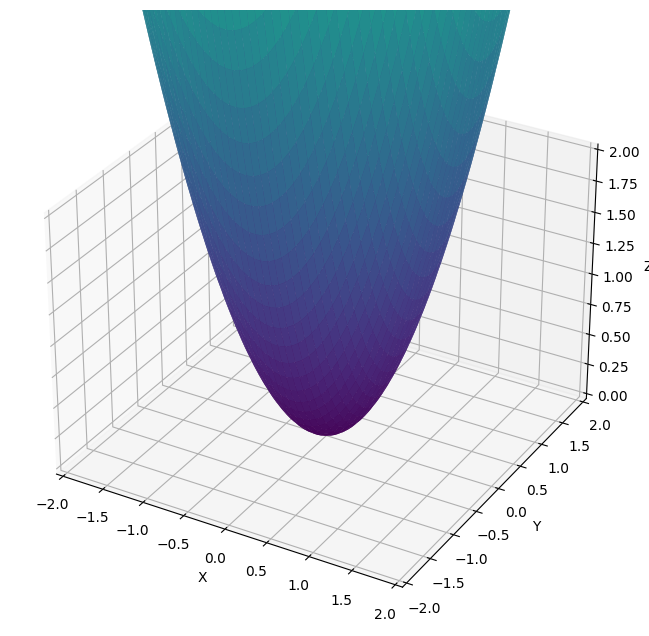

In [41]:
# Creates our symbols
x, y ,z = sp.symbols("x y z")

# Denotes f(x,y,z) = y + z
vector = [x**2,y**2,0]

# Calculates the dirivative of each variable
df_dx = [sp.diff(expr, x) for expr in vector]
df_dy = [sp.diff(expr, y) for expr in vector]
df_dz = [sp.diff(expr, z) for expr in vector]

Diff_f = [df_dx[0],df_dy[1],df_dz[2]]
print(f"Df(x,y,z)= {Diff_f}")

# Calculates the magnitude of the derivaed function:
Mag_Diff_f = sp.sqrt(df_dx[0]**2 + df_dy[1]**2)
print(f"Magnitude of Diff_f = {Mag_Diff_f}")

# Displays the complete solution:
result_list = [expr/Mag_Diff_f for expr in Diff_f]
print(f"The unit surface vector is: {result_list}")

ThreeDPlot(x**2 + y**2,(-2,2),(-2,2),(0,2)).plot()

# Lecture 3

# Lecture 4

# Lecture 5

# Lecture 6

# Lecture 7

# Lecture 8

# Lecture 9

# Lecture 10

# Lecture 11

# Lecture 12

# Lecture 13

# Lecture 14